In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from wordcloud import WordCloud,STOPWORDS

For analysis we will be working on three csv files. by mergeing this files will create a new dataframe and then observe the data.
Note: The Original data contained many book-ratining as 'zero' which was converted into NaN values.

In [103]:
books=pd.read_csv("Books.csv")
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers
1,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers
2,000160418X,The Clue in the Crumbling Wall,Carolyn Keene,1984,HarperCollins Publishers
3,000215871X,Stalin's nose: Across the face of Europe,Rory MacLean,1992,HarperCollins Publishers
4,000225056X,The International Garlic Cookbook,Publishers Staf Collins,1995,HarperCollins


In [104]:
bk_rating=pd.read_csv("Book Rating.csv")
bk_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,NaN
1,276726,155061224,5.0
2,276727,446520802,NaN
3,276729,052165615X,3.0
4,276729,521795028,6.0


In [105]:
bk_user=pd.read_csv("User.csv")
bk_user.head()

,User-ID,Location,State,Country,Age
0,1.0,nyc,new york,usa,NaN
1,2.0,stockton,california,usa,18.0
2,3.0,moscow,yukon territory,russia,NaN
3,4.0,porto,v.n.gaia,portugal,17.0
4,5.0,farnborough,hants,united kingdom,NaN


In [106]:
df = pd.merge(bk_user, bk_rating, on='User-ID')
df.head()

,User-ID,Location,State,Country,Age,ISBN,Book-Rating
0,2.0,stockton,california,usa,18.0,195153448,NaN
1,7.0,washington,dc,usa,NaN,34542252,NaN
2,8.0,timmins,ontario,canada,NaN,2005018,5.0
3,8.0,timmins,ontario,canada,NaN,60973129,NaN
4,8.0,timmins,ontario,canada,NaN,374157065,NaN


In [107]:
df = pd.merge(df, books, on='ISBN')
df.head(5)

,User-ID,Location,State,Country,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8.0,timmins,ontario,canada,NaN,2005018,5.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,8.0,timmins,ontario,canada,NaN,2005018,5.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11676.0,NaN,NA,NA,NaN,2005018,8.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676.0,NaN,NA,NA,NaN,2005018,8.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385.0,sudbury,ontario,canada,NaN,2005018,NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [108]:
df=df.drop(['Location','State'],axis=1)

In [165]:
df=df.dropna()

In [168]:
#after cleaning the data
df

,User-ID,Country,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
6,67544.0,canada,30.0,2005018,8.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
7,67544.0,canada,30.0,2005018,8.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
22,219008.0,canada,60.0,2005018,7.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
23,219008.0,canada,60.0,2005018,7.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
26,2954.0,usa,71.0,60973129,8.0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
...,...,...,...,...,...,...,...,...,...
10633818,278843.0,usa,28.0,082301200X,6.0,Philippe Starck: Subverchic Design (Cutting Edge),Fay Sweet,1999,Watson-Guptill Publications
10633819,278851.0,usa,33.0,067161746X,7.0,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987,Pocket Books
10633820,278851.0,usa,33.0,767907566,5.0,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001,Broadway Books
10633821,278851.0,usa,33.0,884159221,7.0,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095622 entries, 6 to 10633822
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   User-ID              float64
 1   Country              object 
 2   Age                  float64
 3   ISBN                 object 
 4   Book-Rating          float64
 5   Book-Title           object 
 6   Book-Author          object 
 7   Year-Of-Publication  int64  
 8   Publisher            object 
dtypes: float64(3), int64(1), object(5)
memory usage: 236.2+ MB


In [167]:
#Finding highest Book ratings in the range of(1 to 10) 
df['Book-Rating'].value_counts()

8.0     740341
10.0    649701
9.0     577055
7.0     481424
5.0     235790
6.0     227482
4.0      63227
3.0      54911
2.0      37697
1.0      27994
Name: Book-Rating, dtype: int64

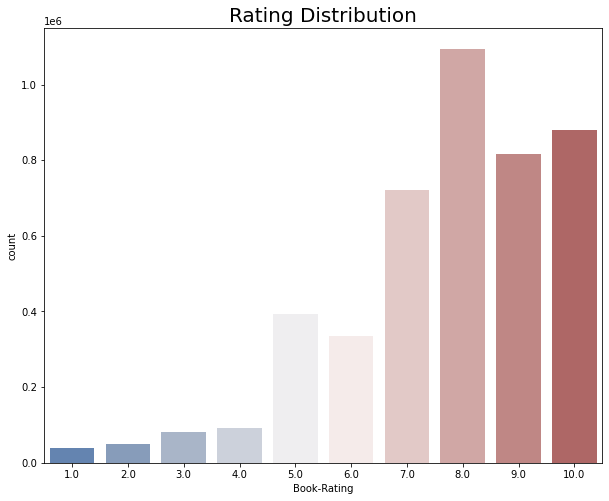

In [111]:
#By bar plot it is clear that 8 is the highest rating value given book readers.
plt.figure(figsize=(10,8))
sns.countplot(x='Book-Rating',data=df, palette ="vlag")
plt.title('Rating Distribution',size=20)
plt.show()

In [112]:
def barplot(df_v,col,l):
    df_v=df[col].value_counts().head(25).reset_index()
    df_v.columns=[col,'count']

    plt.figure(figsize=(10,8))
    sns.barplot(x='count',y=col,data=df_v,palette="vlag")
    plt.ylabel(l)
    plt.title(l,size=20)
    plt.show()

Display of top 25 books that were in demand were discovered based on the book ratings. we can see the huge between the critics of our top two books that is Wild Animus by Author Rich Shapero published in 2004 and The Da Vinci Code by Author Dan Brown published in 2003. As the genre of this two books are different there is alot to discover about the gap between the two,but for now we will stick to the analysis of the books in universal library. 

In [113]:
#Most reviewed book is Wild Animus
book_rating_data=df['Book-Title'].value_counts().head(50).reset_index()
book_rating_data.columns=['book','count']
book_rating_data.head(5)

,book,count
0,Wild Animus,942331
1,The Da Vinci Code,274416
2,The Red Tent (Bestselling Backlist),131400
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel,119222
4,The Secret Life of Bees,113028


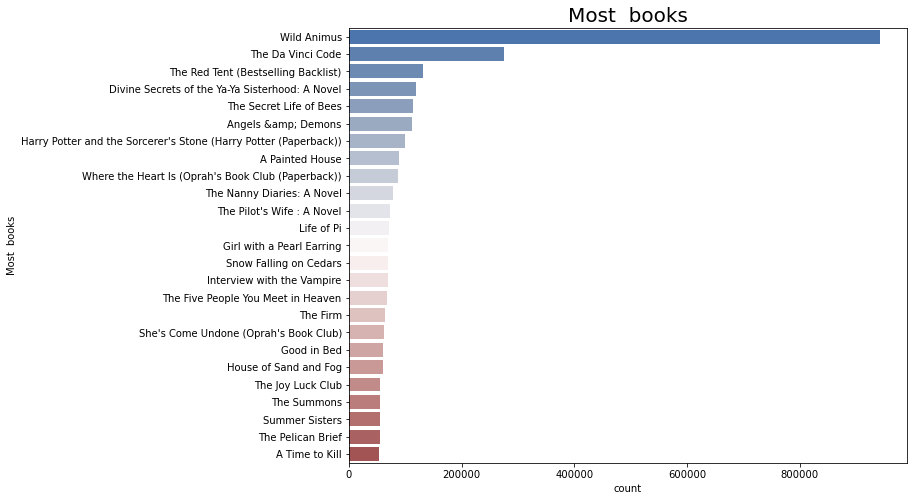

In [114]:
barplot(df,'Book-Title','Most  books')

Top 25 best authors, These are the authors people like to read books. It was analyises that most favored authors are the fiction genre which is subcategories are mainly mainstream fiction.

In [115]:
book_author=df['Book-Author'].value_counts().head(50).reset_index()
book_author.columns=['author','count']
book_author.head()

,author,count
0,Rich Shapero,942331
1,John Grisham,446234
2,Dan Brown,417756
3,J. K. Rowling,277810
4,Stephen King,209127


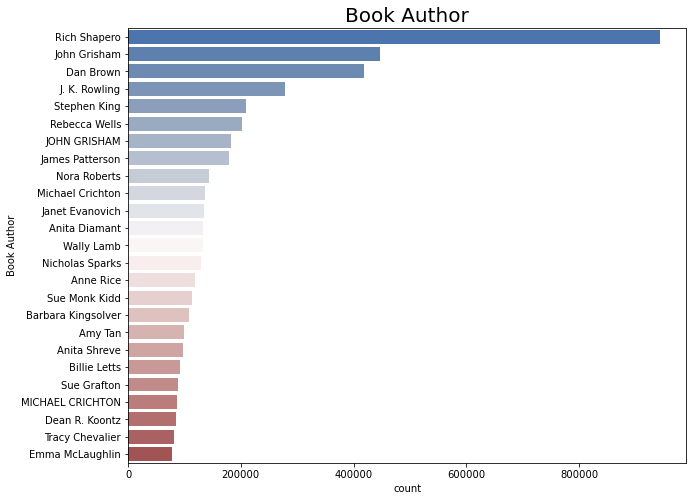

In [116]:
barplot(df,'Book-Author','Book Author')

Top 25 Book Publishers

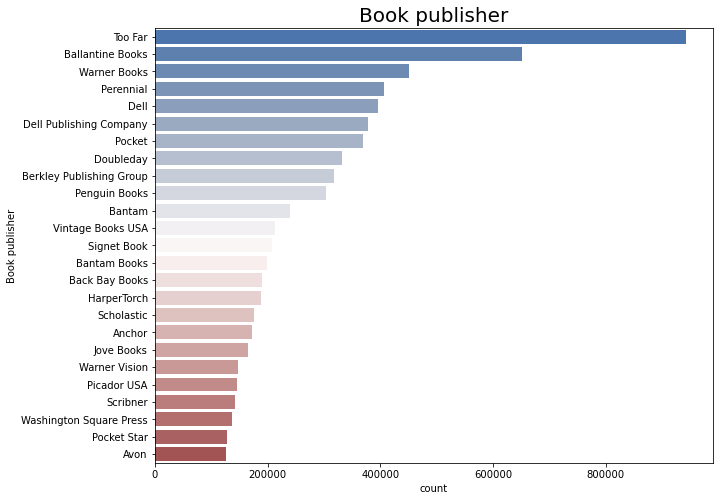

In [117]:
barplot(books_ratings_data,'Publisher','Book publisher')

In [118]:
df_p=df[['Year-Of-Publication']].copy()
df_p['Year-Of-Publication'] = df_p['Year-Of-Publication'].astype(int).astype(str)
df_p=df_p['Year-Of-Publication'].value_counts().head(25).reset_index()
df_p.columns=['year','count']
df_p['year']='Year '+df_p['year']

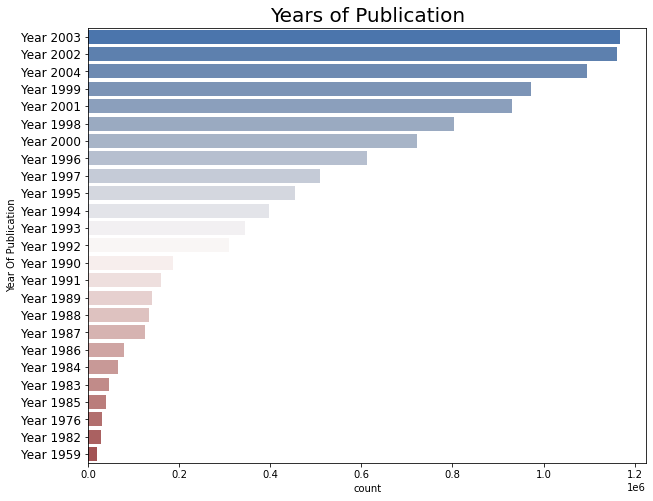

In [119]:
plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_p,palette="vlag")
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

In [120]:
#Find the book readers grouped by country
ds=bk_user['Country'].value_counts().head(50).reset_index()
ds.columns=['country','count']
ds.head(20)

,country,count
0,usa,137883
1,canada,21352
2,united kingdom,18130
3,germany,16908
4,spain,13090
5,australia,11596
6,italy,11129
7,france,3449
8,portugal,3343
9,new zealand,3063


Text(0.5, 1.0, 'Countries with most Ratings')

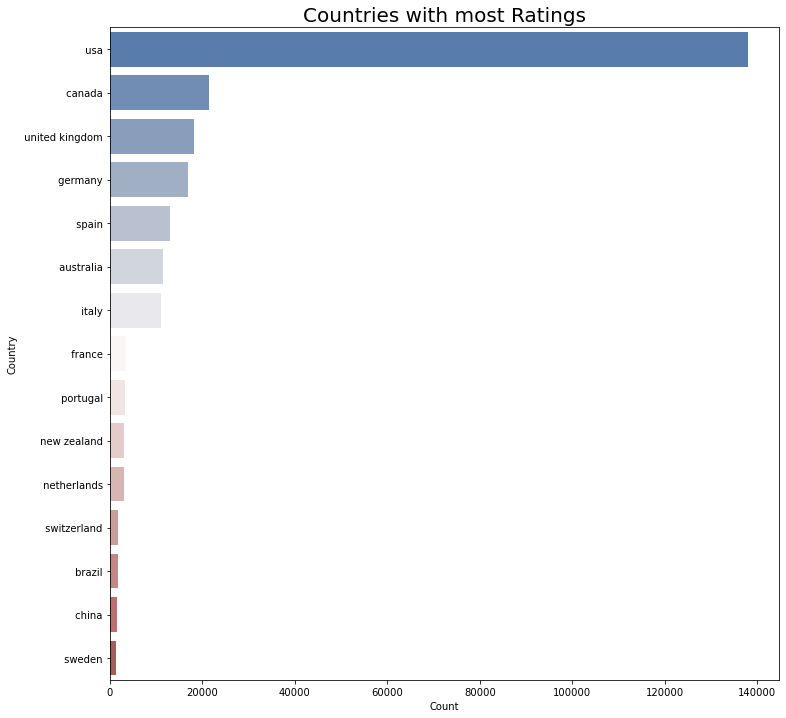

In [121]:
plt.figure(figsize=(12,12))
sns.barplot(x='count',y='country',data=ds.head(15),palette="vlag")
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Countries with most Ratings',size=20)

Surely, there is something uncertain in the age data in the dataset. As we see there are people with min age is 'zero' and max. age is approx. 250 which is quite unrealistic. recheck required on the dataset. 

Text(0.5, 1.0, 'Age Distribution')

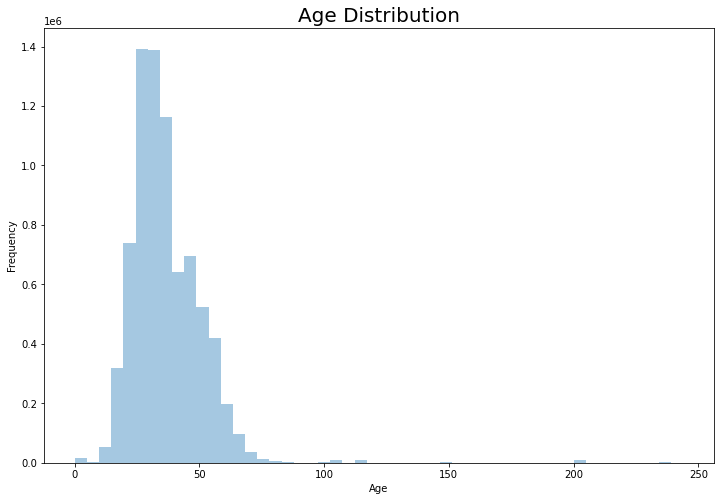

In [124]:
plt.figure(figsize=(12,8))
sns.distplot(df['Age'],kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution',size=20)

In [125]:
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(188)
    s = int(100.0 * 255 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 160)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

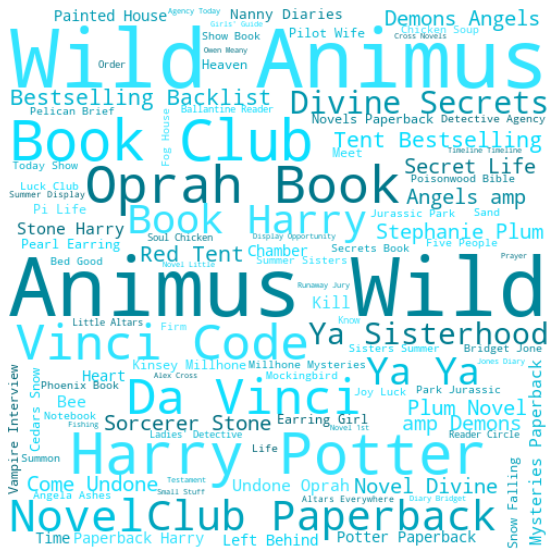

In [126]:
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500,color_func=color_func)
wc.generate(' '.join(books_ratings_data['Book-Title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [153]:
books_ratings_data = books.merge(bk_rating, on='ISBN')
books_ratings_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers,28204,7.0
1,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers,166596,8.0
2,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers,28204,7.0
3,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers,166596,8.0
4,000160418X,The Clue in the Crumbling Wall,Carolyn Keene,1984,HarperCollins Publishers,10067,7.0


In [154]:
number_of_ratings = books_ratings_data.groupby('ISBN')['Book-Rating'].count().reset_index()
number_of_ratings.rename(columns={'Book-Rating': 'Number of Book-Rating'}, inplace=True)
books_ratings_data = books_ratings_data.merge(number_of_ratings, on='ISBN')
books_ratings_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Number of Book-Rating
0,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers,28204,7.0,4
1,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers,166596,8.0,4
2,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers,28204,7.0,4
3,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers,166596,8.0,4
4,000160418X,The Clue in the Crumbling Wall,Carolyn Keene,1984,HarperCollins Publishers,10067,7.0,1
...,...,...,...,...,...,...,...,...
10736405,B0001GMSV2,Find Me,Rosie O'Donnell,2002,Warner Books,24194,8.0,4
10736406,B0001GMSV2,Find Me,Rosie O'Donnell,2002,Warner Books,179772,8.0,4
10736407,B0001GMSV2,Find Me,Rosie O'Donnell,2002,Warner Books,24194,8.0,4
10736408,B0001GMSV2,Find Me,Rosie O'Donnell,2002,Warner Books,179772,8.0,4


In [155]:
books_ratings_data = books_ratings_data[books_ratings_data['Number of Book-Rating'] >= 30]
books_ratings_data.shape

(10167992, 8)

In [156]:
#creating pivot table for csr matrix to predict the recommendation of the book
books_ratings_pivot = books_ratings_data.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
books_ratings_pivot.fillna(0, inplace=True)
books_ratings_pivot

User-ID,9,16,17,19,26,32,39,42,44,51,...,278828,278831,278832,278836,278843,278844,278846,278849,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Selected Poems by E. E. Cummings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001 Things Everyone Should Know About Science,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
book_csr_matrix = csr_matrix(books_ratings_pivot)

In [159]:
model = NearestNeighbors(algorithm='brute')
model.fit(book_csr_matrix)

NearestNeighbors(algorithm='brute')

In [173]:
books_ratings_pivot.iloc[10, :].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [174]:
_, recommendations = model.kneighbors(books_ratings_pivot.iloc[10, :].values.reshape(1,-1))
recommendations

array([[  10,  609, 1316, 1553, 1609]])

In [175]:
for i in range(len(recommendations)):
    print(recommendations[i])
    print(books_ratings_pivot.index[recommendations[i]])

[  10  609 1316 1553 1609]
Index(['1984 (Spanish Language Edition)', 'Black Coffee Blues',
       'Die Klavierspielerin. Roman.', 'Entrevista con el vampiro', 'Face'],
      dtype='object', name='Book-Title')


In [176]:
def recommend_book(book_name):
    books_id = np.where(books_ratings_pivot.index == book_name)[0][0]
    _, recommendations = model.kneighbors(books_ratings_pivot.iloc[books_id,:].values.reshape(1,-1))
    for i in range(len(recommendations)):
        if i == 0:
            print(f"For book \"{book_name}\" is recommended")
        if not i:
            print(books_ratings_pivot.index[recommendations[i]])


In [5]:
recommend_book('Exclusive')

NameError: name 'recommend_book' is not defined